In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline
#tambahkan library sesuai kebutuhan

In [37]:
data = pd.read_csv('activity_km_07_01.csv')
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 1. Mengganti nama kolom yang menggunakan spasi

In [38]:
data = data.rename(columns={'PH': 'pH', 'cahaya': 'cahaya', 'intensitas air': 'intensitas_air', 'suhu':'suhu','PPM':'PPM','tinggi air':'tinggi_air','aksi':'aksi'})

## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [39]:
def getNumber(str):
    if str=="Ada":
        return 1
    elif str=="Tidak ada":
        return 0
    else:
        return str
data["cahaya"]=data["cahaya"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


In [40]:
def getNumber(str):
    if str=="Tinggi":
        return 3
    elif str=="Cukup":
        return 2
    elif str=="Rendah":
        return 1
    elif str=="Rendah sekali":
        return 0
    else:
        return str
data["intensitas_air"]=data["intensitas_air"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,3,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,3,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,3,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,3,27.1,602.0,444,Tidak melakukan apa-apa


In [41]:
def getNumber(str):
    if str=="Hidupkan Lampu dan Pompa nutrisi TDS":
        return 3
    elif str=="Hidupkan Lampu":
        return 2
    elif str=="Hidupkan Pompa nutrisi TDS":
        return 1
    elif str=="Tidak melakukan apa-apa":
        return 0
    else:
        return str
        
data["aksi"]=data["aksi"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3,27.0,188.0,622,3
1,5.7,1.0,3,26.9,79.0,557,3
2,6.0,1.0,3,27.0,11.0,491,3
3,6.5,1.0,3,27.1,345.0,12000,0
4,6.2,NaN,3,27.1,602.0,444,0


## 3. Handle Missing Value

In [42]:
#Cek missing value
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
pH,16,1.795735
cahaya,26,2.918070
intensitas_air,0,0.000000
suhu,27,3.030303
PPM,5,0.561167
tinggi_air,0,0.000000
aksi,0,0.000000


In [43]:
#mengelompokkan missing value
column_missing = ['pH', 'cahaya', 'suhu', 'PPM']
column_missing

['pH', 'cahaya', 'suhu', 'PPM']

In [44]:
#solve missing value
for col in column_missing:
  data[col].replace(np.nan, data[col].mean(), inplace=True)

data.isnull().sum()

pH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

In [45]:
data.columns

Index(['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi'], dtype='object')

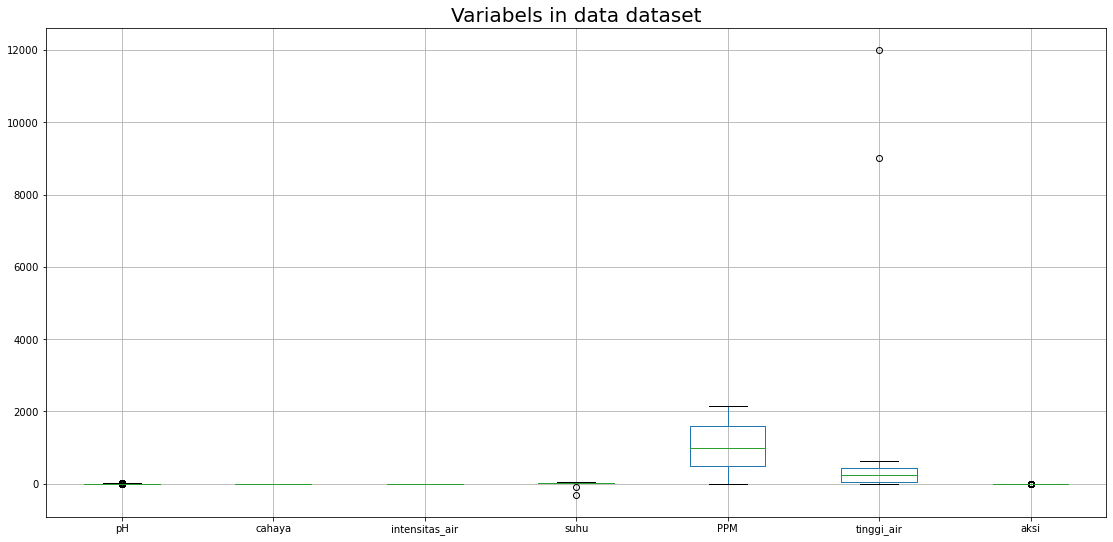

In [13]:
num_cols = ['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Variabels in data dataset", fontsize=20)
plt.show()

In [ ]:
#terlihat bahwa kolom yang mempunyai outliers adalah tinggi_air dan suhu

In [46]:
#replace outliers suhu
Q1 = data['suhu'].quantile(0.25)
Q3 = data['suhu'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['suhu']=np.where(data['suhu']>upper_whisker,upper_whisker,np.where(data['suhu']<lower_whisker,lower_whisker,data['suhu']))

In [47]:
#replace outliers tinggi_air
Q1 = data['tinggi_air'].quantile(0.25)
Q3 = data['tinggi_air'].quantile(0.75)
IQR = Q3 - Q1

whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['tinggi_air']=np.where(data['tinggi_air']>upper_whisker,upper_whisker,np.where(data['tinggi_air']<lower_whisker,lower_whisker,data['tinggi_air']))

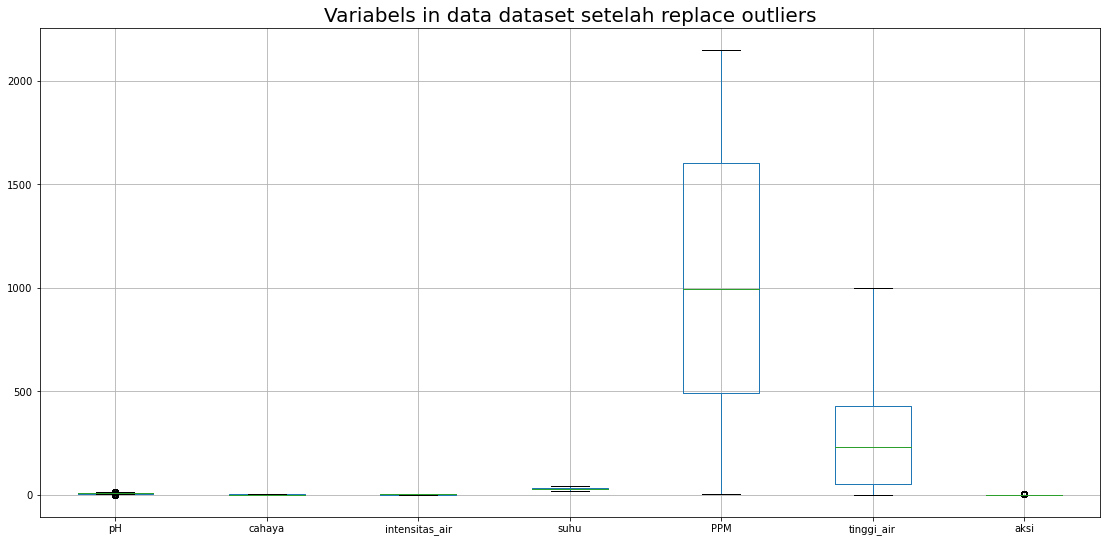

In [16]:
#setelah direplace outliers nya
num_cols = ['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Variabels in data dataset setelah replace outliers", fontsize=20)
plt.show()

## 5. Pisahkan data feature dengan label

In [49]:
X = data.iloc[:,:6].values
X

array([[6.500e+00, 1.000e+00, 3.000e+00, 2.700e+01, 1.880e+02, 6.220e+02],
       [5.700e+00, 1.000e+00, 3.000e+00, 2.690e+01, 7.900e+01, 5.570e+02],
       [6.000e+00, 1.000e+00, 3.000e+00, 2.700e+01, 1.100e+01, 4.910e+02],
       ...,
       [3.200e+00, 1.000e+00, 0.000e+00, 2.530e+01, 7.930e+02, 1.900e+01],
       [1.400e+00, 1.000e+00, 0.000e+00, 2.540e+01, 1.052e+03, 3.000e+00],
       [5.000e+00, 1.000e+00, 0.000e+00, 2.530e+01, 9.770e+02, 1.900e+01]])

In [50]:
Y = data.iloc[:, 6].values
Y

array([3, 3, 3, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 3, 0, 3, 3, 3,

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [51]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
from collections import Counter
counter = Counter(Y)
print(counter)

Counter({0: 473, 2: 92, 3: 39, 1: 12})


In [54]:
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [55]:
counter = Counter(Y_smote)
print(counter)

Counter({3: 473, 0: 473, 2: 473, 1: 473})


## 7. Visualisasikan Data sehingga kita bisa mengetahui sebuah informasi

In [56]:
import seaborn as sns

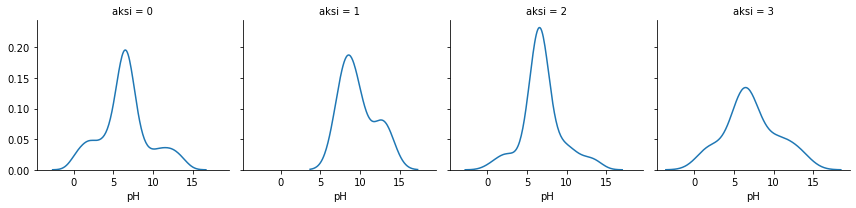

In [57]:
g = sns.FacetGrid(data, col='aksi')
g = g.map(sns.kdeplot, 'pH')


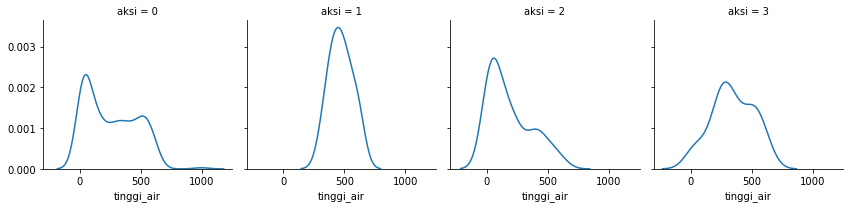

In [58]:
g = sns.FacetGrid(data, col='aksi')
g = g.map(sns.kdeplot, 'tinggi_air')


## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()

# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.46428571 1.         1.         0.38738739 0.08705773 0.62277847]
 [0.40714286 1.         1.         0.38288288 0.03631285 0.55769712]
 [0.42857143 1.         1.         0.38738739 0.00465549 0.49161452]
 ...
 [0.22857143 1.         0.         0.31081081 0.36871508 0.01902378]
 [0.1        1.         0.         0.31531532 0.48929236 0.00300375]
 [0.35714286 1.         0.         0.31081081 0.45437616 0.01902378]]


## 9. Membuat Model KNN

In [60]:
data['aksi'].value_counts()

0    473
2     92
3     39
1     12
Name: aksi, dtype: int64

#### Mendefinisikan Label

In [64]:
X = data[['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air']].values  #.astype(float)
X[0:5]

array([[6.50000000e+00, 1.00000000e+00, 3.00000000e+00, 2.70000000e+01,
        1.88000000e+02, 6.22000000e+02],
       [5.70000000e+00, 1.00000000e+00, 3.00000000e+00, 2.69000000e+01,
        7.90000000e+01, 5.57000000e+02],
       [6.00000000e+00, 1.00000000e+00, 3.00000000e+00, 2.70000000e+01,
        1.10000000e+01, 4.91000000e+02],
       [6.50000000e+00, 1.00000000e+00, 3.00000000e+00, 2.71000000e+01,
        3.45000000e+02, 9.98750000e+02],
       [6.20000000e+00, 5.11864407e-01, 3.00000000e+00, 2.71000000e+01,
        6.02000000e+02, 4.44000000e+02]])

In [62]:
Y = data['aksi'].values
Y[0:5]

array([3, 3, 3, 0, 0], dtype=int64)

#### Normalisasi

sudah dilakukan di atas

#### Membagi data Training dan Testing

In [65]:
from sklearn import preprocessing

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=42)  #ada 30% data untuk dites
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (431, 6) (431,)
Test set: (185, 6) (185,)


In [69]:
from sklearn.neighbors import KNeighborsClassifier

#### Mencari nilai K terbaik

In [125]:
from sklearn import metrics

Ks = 30
mean_acc = np.zeros((Ks))

for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train) #buat model
    yhat=neigh.predict(X_test) #memprediksi
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

mean_acc

array([0.68108108, 0.71351351, 0.67027027, 0.70810811, 0.7027027 ,
       0.71351351, 0.72432432, 0.72432432, 0.72972973, 0.73513514,
       0.71891892, 0.72432432, 0.71891892, 0.74594595, 0.75135135,
       0.74054054, 0.75135135, 0.74594595, 0.74594595, 0.75135135,
       0.75135135, 0.75135135, 0.75675676, 0.75135135, 0.74594595,
       0.73513514, 0.73513514, 0.74054054, 0.73513514, 0.72972973])

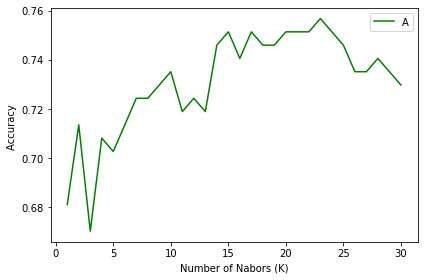

In [126]:
plt.plot(range(1,Ks+1),mean_acc,'g')

plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

#### Training

In [119]:
k = 15
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(n_neighbors=17)

#### Predicting dengan k=10

In [120]:
yhat = knn.predict(X_test)
yhat[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [121]:
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Test set Accuracy:  0.7513513513513513
